### Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Load CSV File

In [2]:
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

### Dropping Unnecessary Columns

In [4]:
loan_data.drop(columns=['Loan_ID'], axis=1, inplace=True)

In [5]:
loan_data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [6]:
loan_data.shape

(614, 12)

### Getting information about the dataset

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Checking for Missing Values

In [8]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Dropping the Rows with Missing Values

In [9]:
loan_data.dropna(inplace=True)

In [10]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Performing LabelEncoding for Categorical Values

In [11]:
loan_data.replace({ 'Loan_Status' : { 'N' : 0, 'Y': 1 } }, inplace=True)

In [12]:
loan_data.replace({ 'Gender' : { 'Male' : 1, 'Female': 0 } }, inplace=True)

In [13]:
loan_data.replace({ 'Married' : { 'Yes' : 1, 'No': 0 } }, inplace=True)

In [14]:
loan_data.replace({ 'Education' : { 'Graduate' : 1, 'Not Graduate': 0 } }, inplace=True)

In [15]:
loan_data.replace({ 'Self_Employed' : { 'Yes' : 1, 'No': 0 } }, inplace=True)

In [16]:
loan_data.replace({ 'Property_Area' : { 'Urban' : 1, 'Rural': 0, 'Semiurban': 2 } }, inplace=True)

In [17]:
loan_data.replace({ 'Dependents' : { '3+' : 4 } }, inplace=True)

In [18]:
loan_data.replace({ 'Loan_Status' : { 'Y' : 1, 'N': 0 } }, inplace=True)

In [19]:
loan_data

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  Loan_Status  
1                0            0  
2                1            1  
3                1            1  
4                1            1  
5                1            1  
..             ...          ...  
609              0            1  
610              0            1  
611              1            1  
612              1            1  
613              2            0  

[480 rows x 12 columns]

### Visualizing Data

#### Checking the number of persons eligible for loan w.r.t the education

<Axes: xlabel='Education', ylabel='count'>

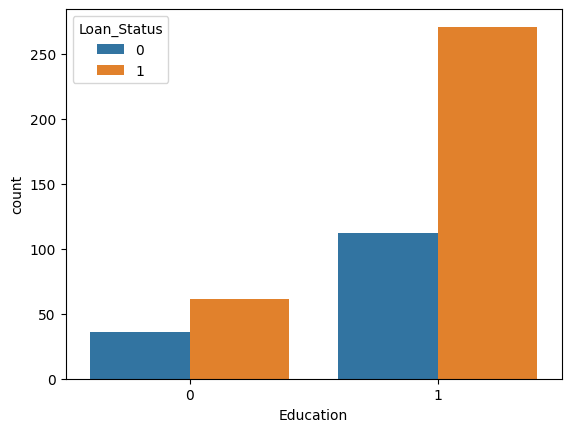

In [20]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)

#### Checking the number of persons eligible for loan w.r.t the no. of dependents

<Axes: xlabel='Dependents', ylabel='count'>

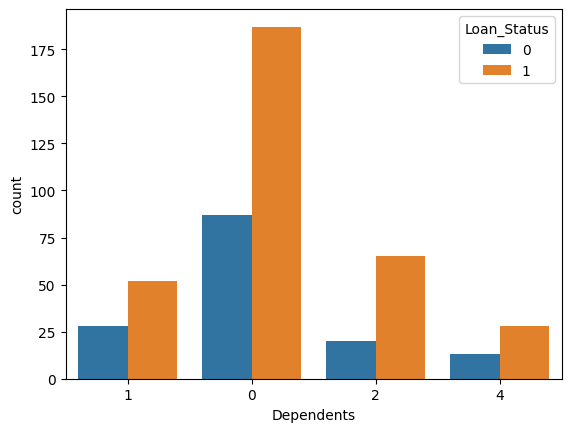

In [21]:
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_data)

#### Checking the number of persons eligible for loan w.r.t to the Marital Status

<Axes: xlabel='Married', ylabel='count'>

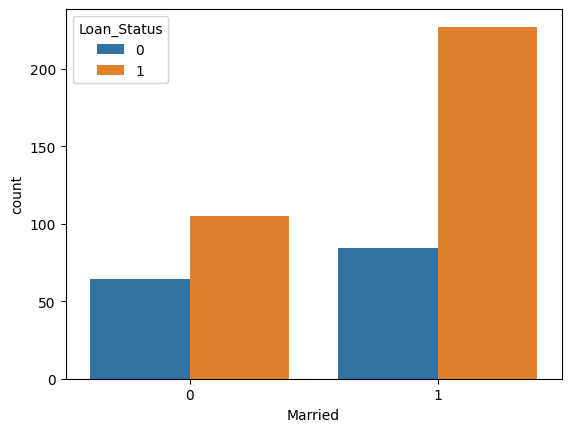

In [22]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_data)

#### Checking the number of persons eligible for loan w.r.t to the Credit History

<Axes: xlabel='Credit_History', ylabel='count'>

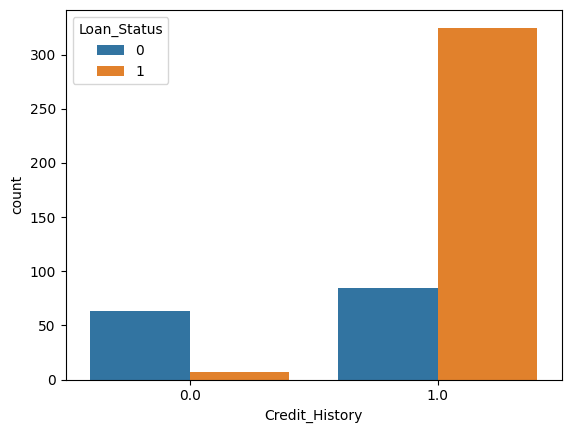

In [23]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_data)

### Splitting the data into features and labels

In [24]:
X = loan_data.drop(columns=['Loan_Status'], axis=1)
y = loan_data['Loan_Status']

In [25]:
X.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  
1              0  
2              1  
3              1  
4              1  
5              1

In [26]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

### Applying train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 3)

### Initializing the Model

In [28]:
model = SVC(kernel='linear')

### Training the Model

In [29]:
model.fit(X_train, y_train)

SVC(kernel='linear')

### Checking the accuracy on training data and testing data

In [30]:
prediction_X_train = model.predict(X_train)

print(f"Accuracy on training data: {accuracy_score(y_train, prediction_X_train)}")

Accuracy on training data: 0.7890625


In [31]:
prediction_X_test = model.predict(X_test)

print(f"Accuracy on testing data: {accuracy_score(y_test, prediction_X_test)}")

Accuracy on testing data: 0.78125


### Predicted Value VS Actual Value

In [32]:
label_names = ['Not Eligible for Loan', 'Eligible for Loan']

y_test = y_test.reset_index(drop=True)

for i in range(len(prediction_X_test)):
  print(f"Predicted Value: {label_names[prediction_X_test[i]]}, Actual Value: {label_names[y_test[i]]}")

Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Not Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Not Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Not Eligible for Loan, Actual Value: Not Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Not Eligible for Loan
Predicted Value: Not Eligible for Loan, Actual Value: Not Eligible for Loan
Predicted Value: Eligible for Loan, Actual Value: Eligible for Loan
Predicted Value: Eli

### Generating a pickle file of the machine learning model

In [33]:
import pickle

with open('loan_status_model.pkl', 'wb') as f:
    pickle.dump(model, f)